In [7]:
#Importing librarys
!pip install opencv-python
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.2 MB/s eta 0:00:13
   ---------------------------------------- 0.1/38.8 MB 3.2 MB/s eta 0:00:13
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.8 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.3/38.8 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.3/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.4/38.8 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.5/38.8 MB 1.5 MB/s eta 0:00:27
    --------------------------------------- 0.5/38.8 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.6/38.8 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.7/38.8 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.8/38.8 MB 1.5 MB/s eta 0:00:25
    --

In [8]:
#Set images path
directory = "C:\\Users\\Darshan\\OneDrive\\Desktop\\DataSet\\Images\\Images"
df_label = pd.read_csv("C:\\Users\\Darshan\\OneDrive\\Desktop\\DataSet\\metadata.csv")

In [9]:
#Reading images
images = []
labels = []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        filepath = os.path.join(directory,filename)
        label = int(df_label[df_label["filename"] == filename]["label"])
        image = cv2.imread(filepath)
        image = cv2.resize(image,(224,224))
        images.append(image)
        labels.append(label)

C:\Users\Darshan\AppData\Local\Temp\ipykernel_4072\491904331.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  label = int(df_label[df_label["filename"] == filename]["label"])


In [10]:
print("m exemples : ",np.array(images).shape)

m exemples :  (237, 224, 224, 3)


In [11]:
#Applying data augmentation since we dont have enougth data :
augmented_images = []
augmented_labels = []
for image,label in zip(images, labels):
    augmented_image = cv2.flip(image,1)
    augmented_images.append(augmented_image)
    augmented_labels.append(label)
images += augmented_images
labels += augmented_labels

In [12]:
#Spliting data 
images = np.array(images)
labels = np.array(labels)
X = np.array(images)
y = np.array(labels) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
#Applying normalization
X_train = X_train / 255.0
X_test =  X_test / 255.0

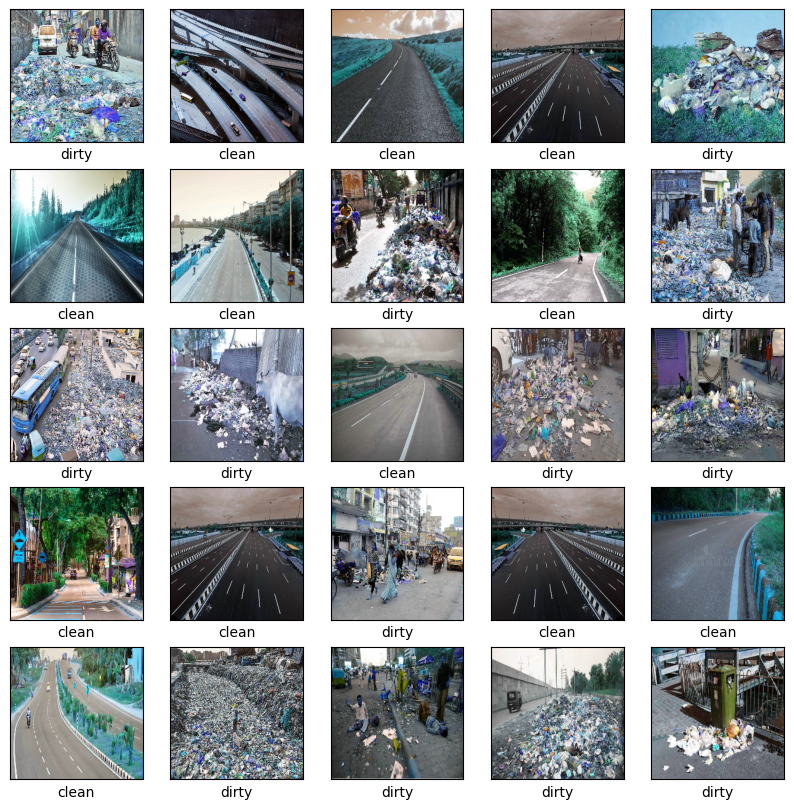

In [14]:
classes = {1:"dirty",0:"clean"}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [15]:
#Transfer learning on VGG-16
from tensorflow.keras.applications.vgg16 import VGG16
#Loading the pre-trained model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [16]:
#Freeze pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential
#Model
model = Sequential([
    vgg_model,
    Dropout(0.7),
    Flatten(),
    Dropout(0.5),
    Dense(128,activation="relu"),
    Dense(len(classes),activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 115s 11s/step - accuracy: 0.9887 - loss: 0.0331 - val_accuracy: 0.9930 - val_loss: 0.0285
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 118s 11s/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9790 - val_loss: 0.0329
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 107s 10s/step - accuracy: 0.9784 - loss: 0.0523 - val_accuracy: 0.9720 - val_loss: 0.0544
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 95s 9s/step - accuracy: 0.9871 - loss: 0.0336 - val_accuracy: 0.9930 - val_loss: 0.0153
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 91s 8s/step - accuracy: 0.9770 - loss: 0.0523 - val_accuracy: 0.9720 - val_loss: 0.0745


In [20]:
loss,accuracy = model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.9759 - loss: 0.0844


In [21]:
print("Test set accuracy : ",accuracy)

Test set accuracy :  0.9720279574394226


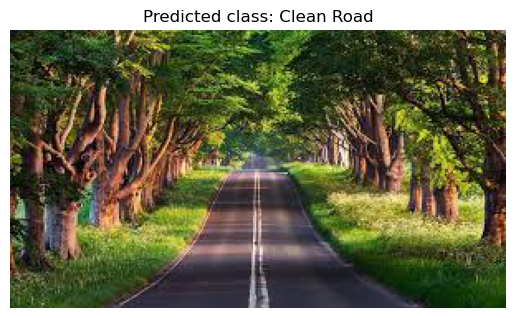

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the SavedModel
saved_model_path = 'C:\\Users\\Darshan\\OneDrive\\Desktop\\DataSet\\Model_SavedModel'
model = tf.saved_model.load(saved_model_path)

# Function to preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image if required by your model
    return img_array

# Function to display the image and its prediction
def display_image_with_prediction(img_path, class_names):
    # Preprocess the image
    preprocessed_image = load_and_preprocess_image(img_path, (224, 224))
    
    # Make a prediction
    infer = model.signatures['serving_default']
    predictions = infer(tf.constant(preprocessed_image))
    
    # Extract the output tensor
    output_tensor = predictions['output_0']
    output_array = output_tensor.numpy()
    
    # Get the predicted class
    predicted_class = np.argmax(output_array, axis=-1)[0]
    
    # Display the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Predicted class: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

# Define your actual class names
class_names = ['Clean Road', 'Dirty Road']  # Replace with your actual class names

# Path to the image you want to predict
img_path = "C:\\Users\\Darshan\\OneDrive\\Desktop\\DataSet\\download (1).jpeg"

# Display the image and prediction
display_image_with_prediction(img_path, class_names)
